In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Data pipeline fuel dataset

For the fuel prices analysis (subquestion 1), the following dataset is used:
**brandstofprijzen.csv**

### Formatting data

**1)** The data is imported using pandas.

**2)** The index column is set to 'Perioden', the column with the days.

**3)** The data is filtered, only the years 2010 to 2017 are relevant.


Now that the dataset is imported and the irrelevant years are filtered out, the data is further processed.


### Processing data

**1)** Resample the DataFrame to years and months. We are interested in yearly and monthly average fuel prices.

**2)** Seperate the fuel types Benzine and Diesel. Since LPG is hardly used anymore, this fuel type is not analyzed further. We now obtained a monthly and yearly set of the average fuel price for both Benzine and Diesel.

**3)** Use the Benzine and Diesel prices to calculate an average fuel priced, which is used for this analyses and compared to both Benzine and Diesel.




In [2]:
prijzen = pd.read_csv('brandstofprijzen.csv', delimiter = ';', index_col = 'Perioden', parse_dates = ['Perioden'])

In [3]:
prijsjaar = prijzen.resample('YE', kind = 'period').mean()
prijsmaand = prijzen.resample('ME', kind = 'period').mean()

C:\Users\luket\AppData\Local\Temp\ipykernel_12632\942310975.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  prijsjaar = prijzen.resample('YE', kind = 'period').mean()
C:\Users\luket\AppData\Local\Temp\ipykernel_12632\942310975.py:2: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  prijsmaand = prijzen.resample('ME', kind = 'period').mean()


In [4]:
prijsmaand1017 = prijsmaand.loc['2010':'2017']
prijsjaar1017 = prijsjaar.loc['2010':'2017']

In [5]:
benzinejaar1017 = prijsjaar.loc['2010':'2017', 'BenzineEuro95_1']
benzinemaand1017 = prijsmaand.loc['2010':'2017', 'BenzineEuro95_1']
dieseljaar1017 = prijsjaar.loc['2010':'2017', 'Diesel_2']
dieselmaand1017 = prijsmaand.loc['2010':'2017', 'Diesel_2']  
gemmaand1017 = (benzinemaand1017 + dieselmaand1017) / 2
gemjaar1017 =  (benzinejaar1017 + dieseljaar1017) / 2

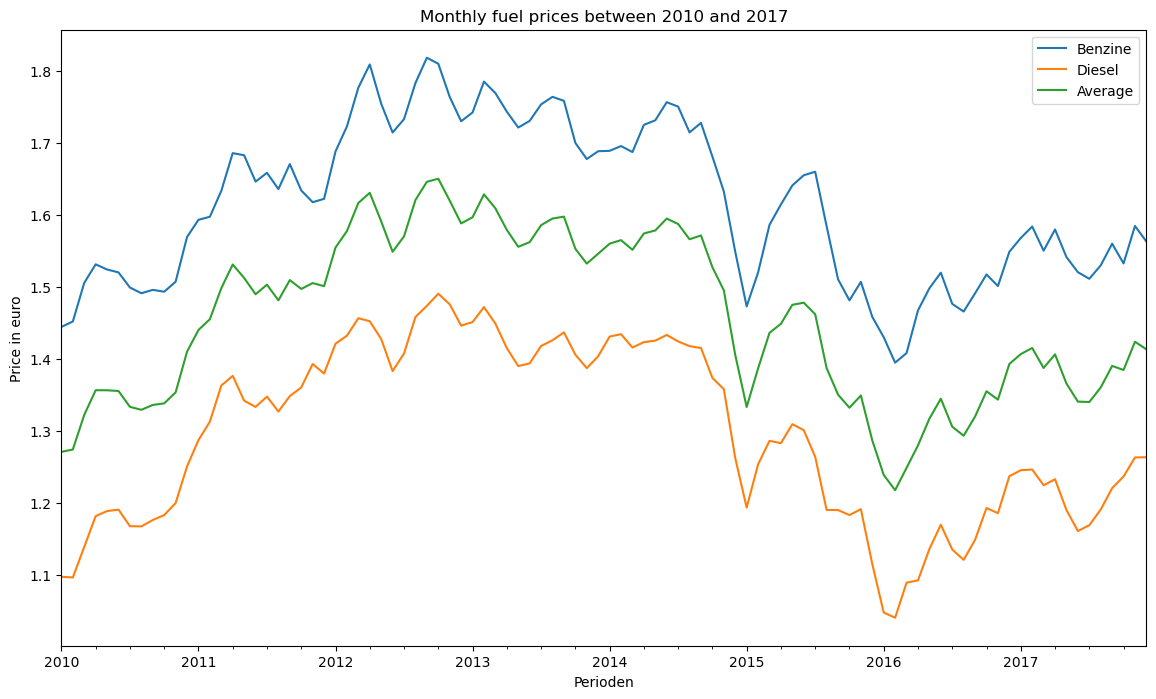

In [6]:
plt.figure(figsize = (14,8))
benzinemaand1017.plot(label = 'Benzine')
dieselmaand1017.plot(label = 'Diesel')
gemmaand1017.plot(label = 'Average')
plt.legend()
plt.ylabel('Price in euro')
plt.title('Monthly fuel prices between 2010 and 2017');

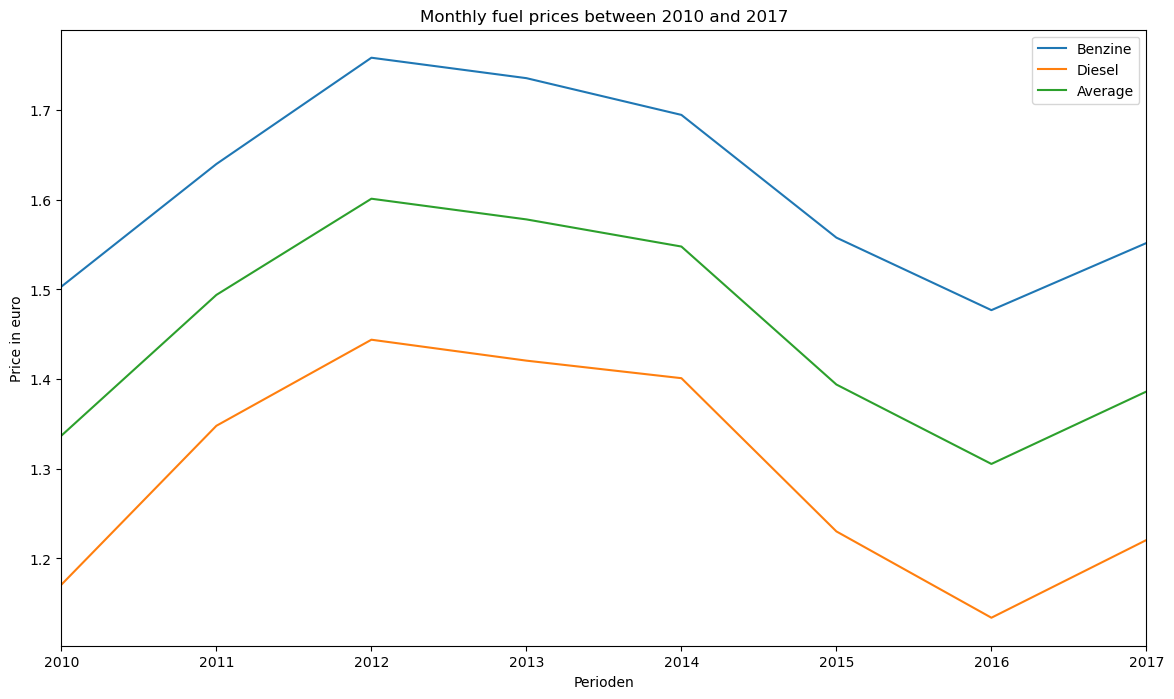

In [7]:
plt.figure(figsize = (14,8))
benzinejaar1017.plot(label = 'Benzine')
dieseljaar1017.plot(label = 'Diesel')
gemjaar1017.plot(label = 'Average')
plt.legend()
plt.ylabel('Price in euro')
plt.title('Monthly fuel prices between 2010 and 2017');

In [8]:
benzinejaar0618 = prijsjaar.loc['2006':'2018', 'BenzineEuro95_1']
dieseljaar0618 = prijsjaar.loc['2006':'2018', 'Diesel_2'] 
gemjaar0618 =  (benzinejaar0618 + dieseljaar0618) / 2

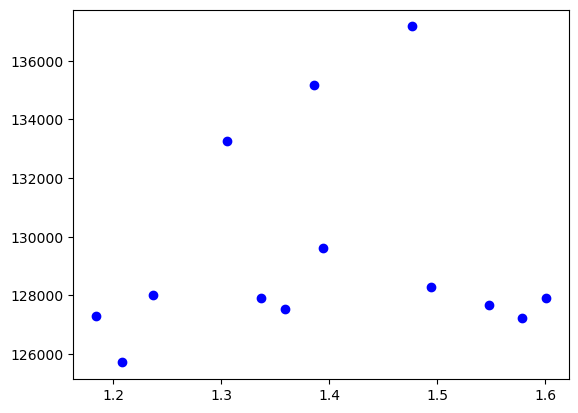

In [9]:
data2 = pd.read_csv("Traffic_motor_vehicles_21102024_112422.csv", delimiter=';', decimal='.', index_col='Periods')
plt.plot(gemjaar0618, data2[data2['Types of vehicle'].isin(['Total motor vehicles'])]['Kilometres in the Netherlands/Total kilometres in the Netherlands (million km)'], 'bo');

[]

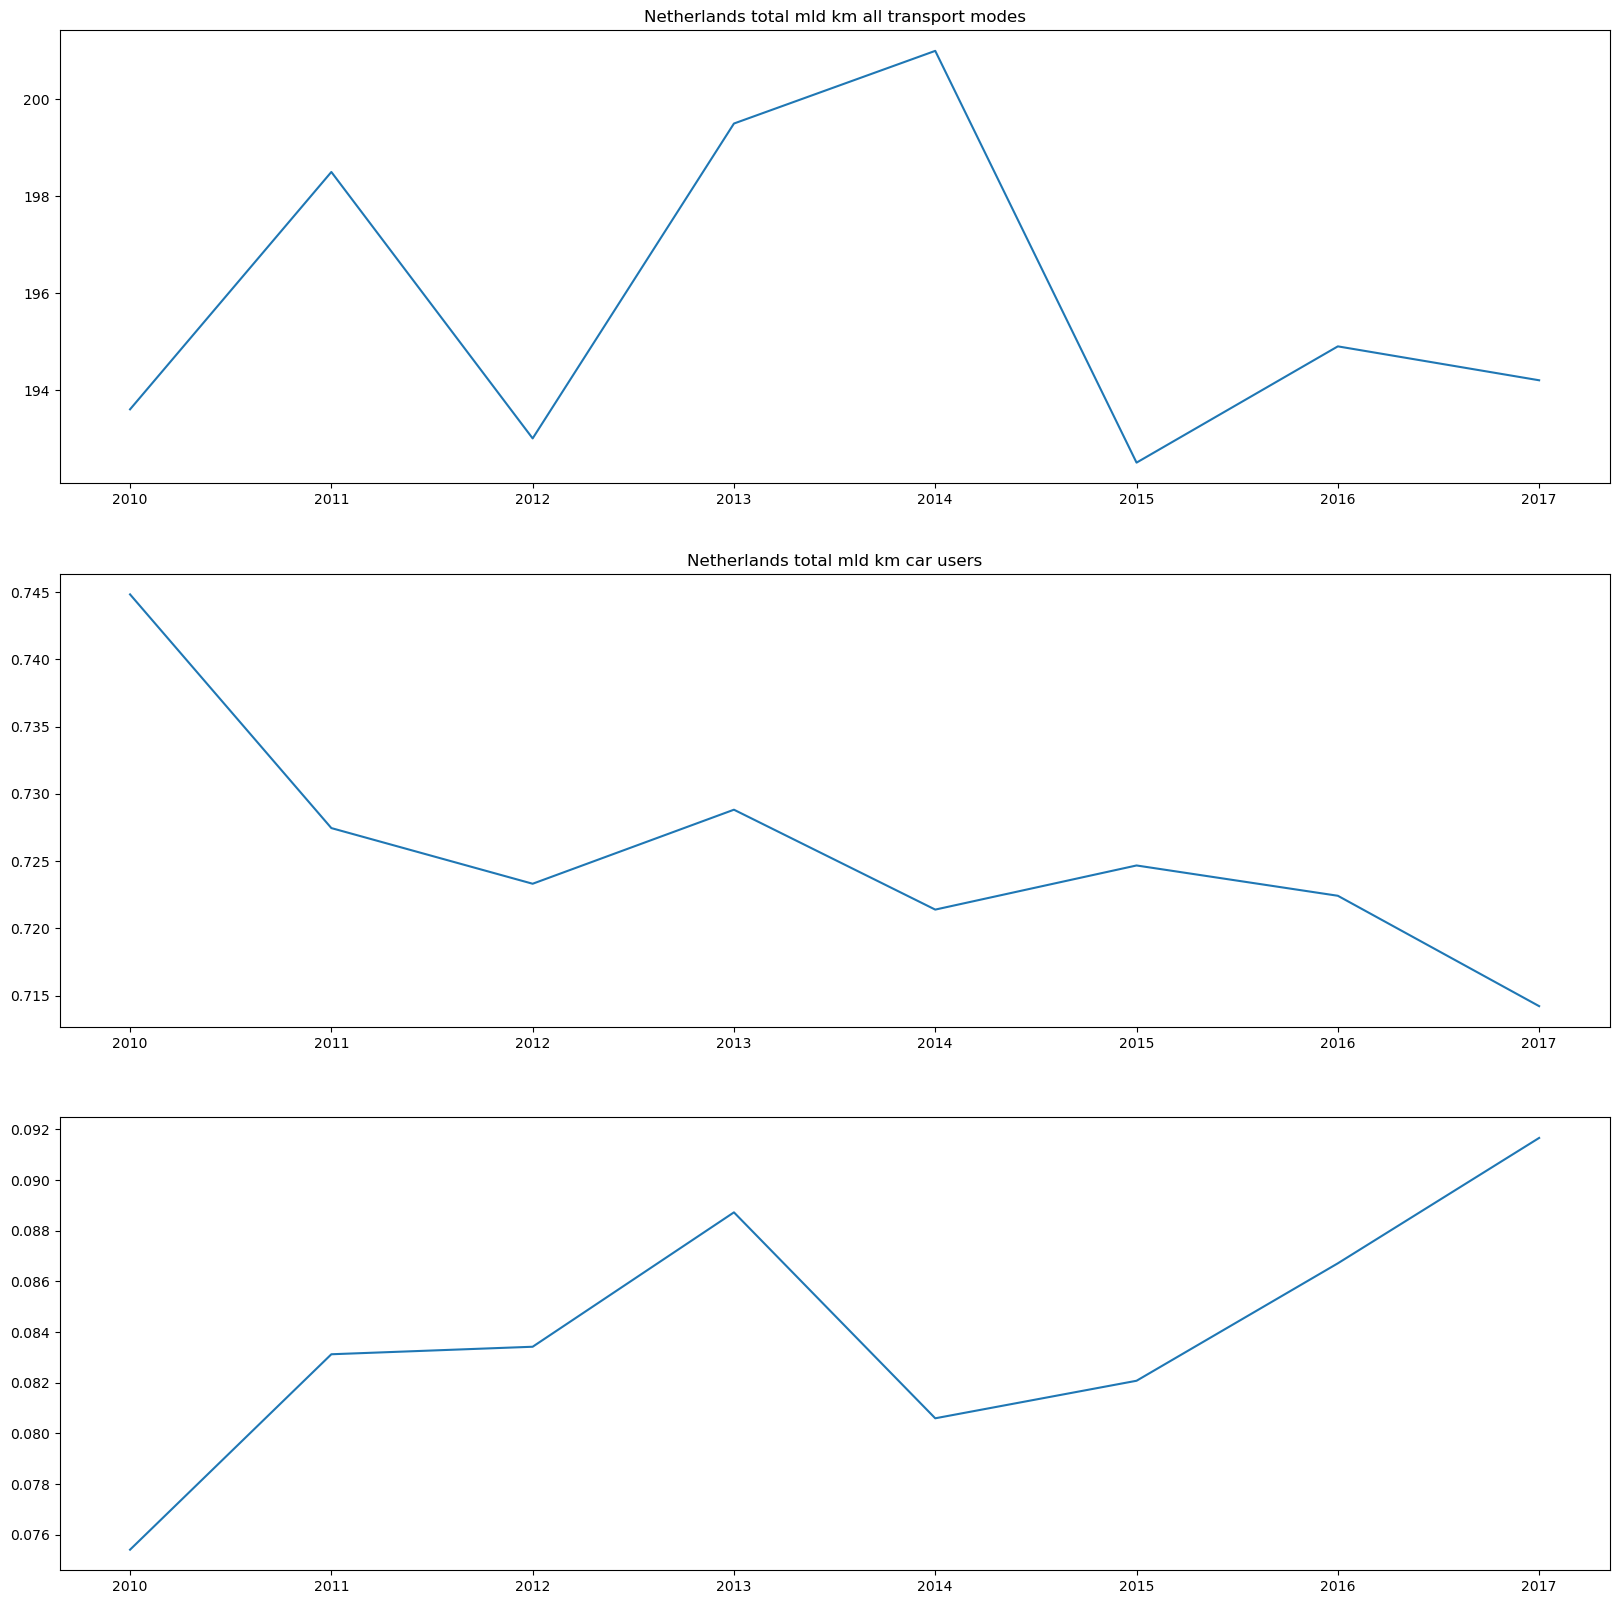

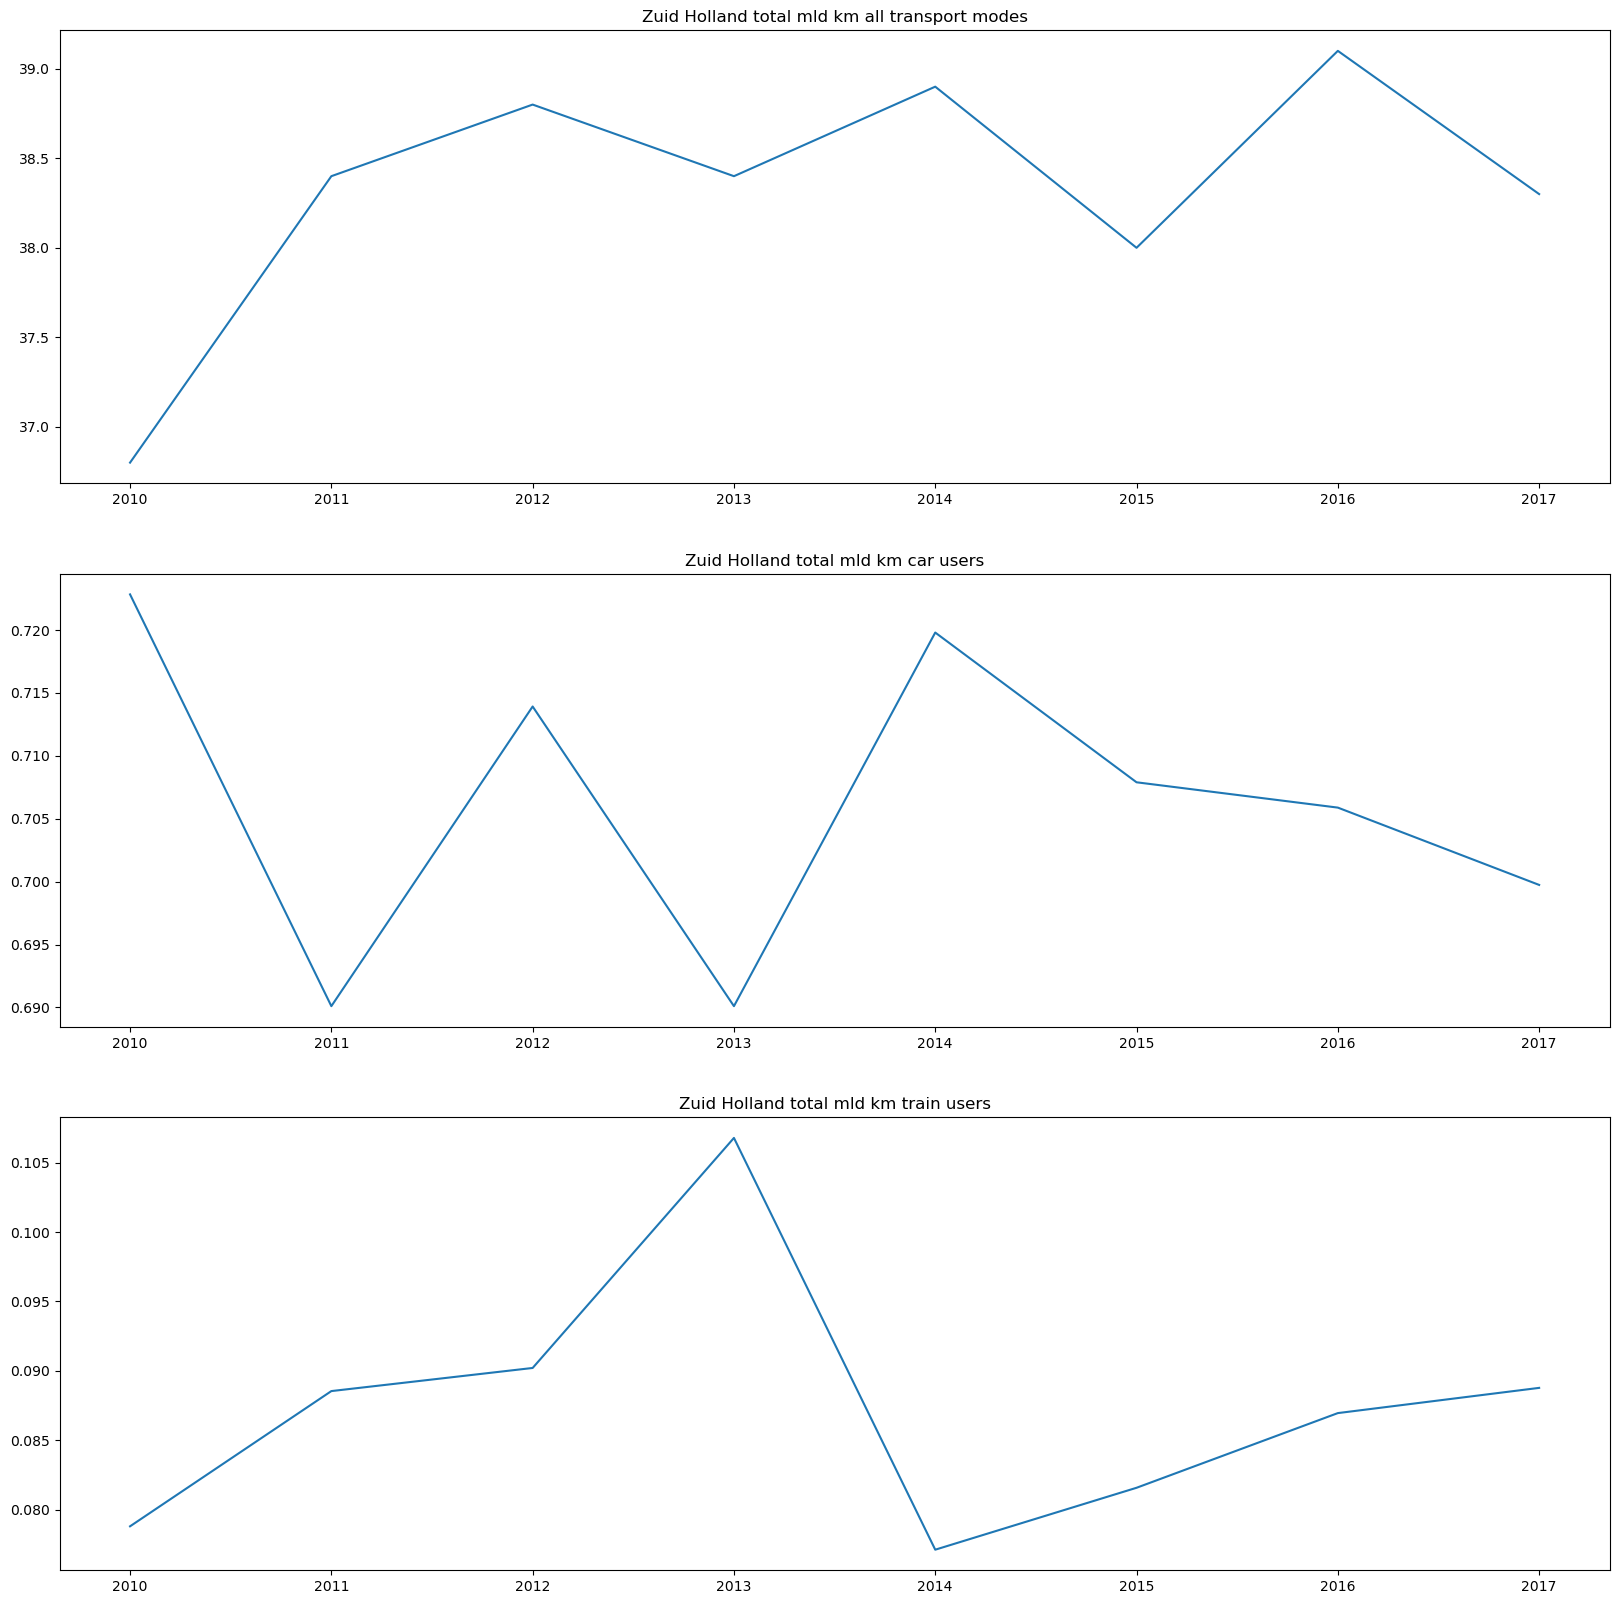

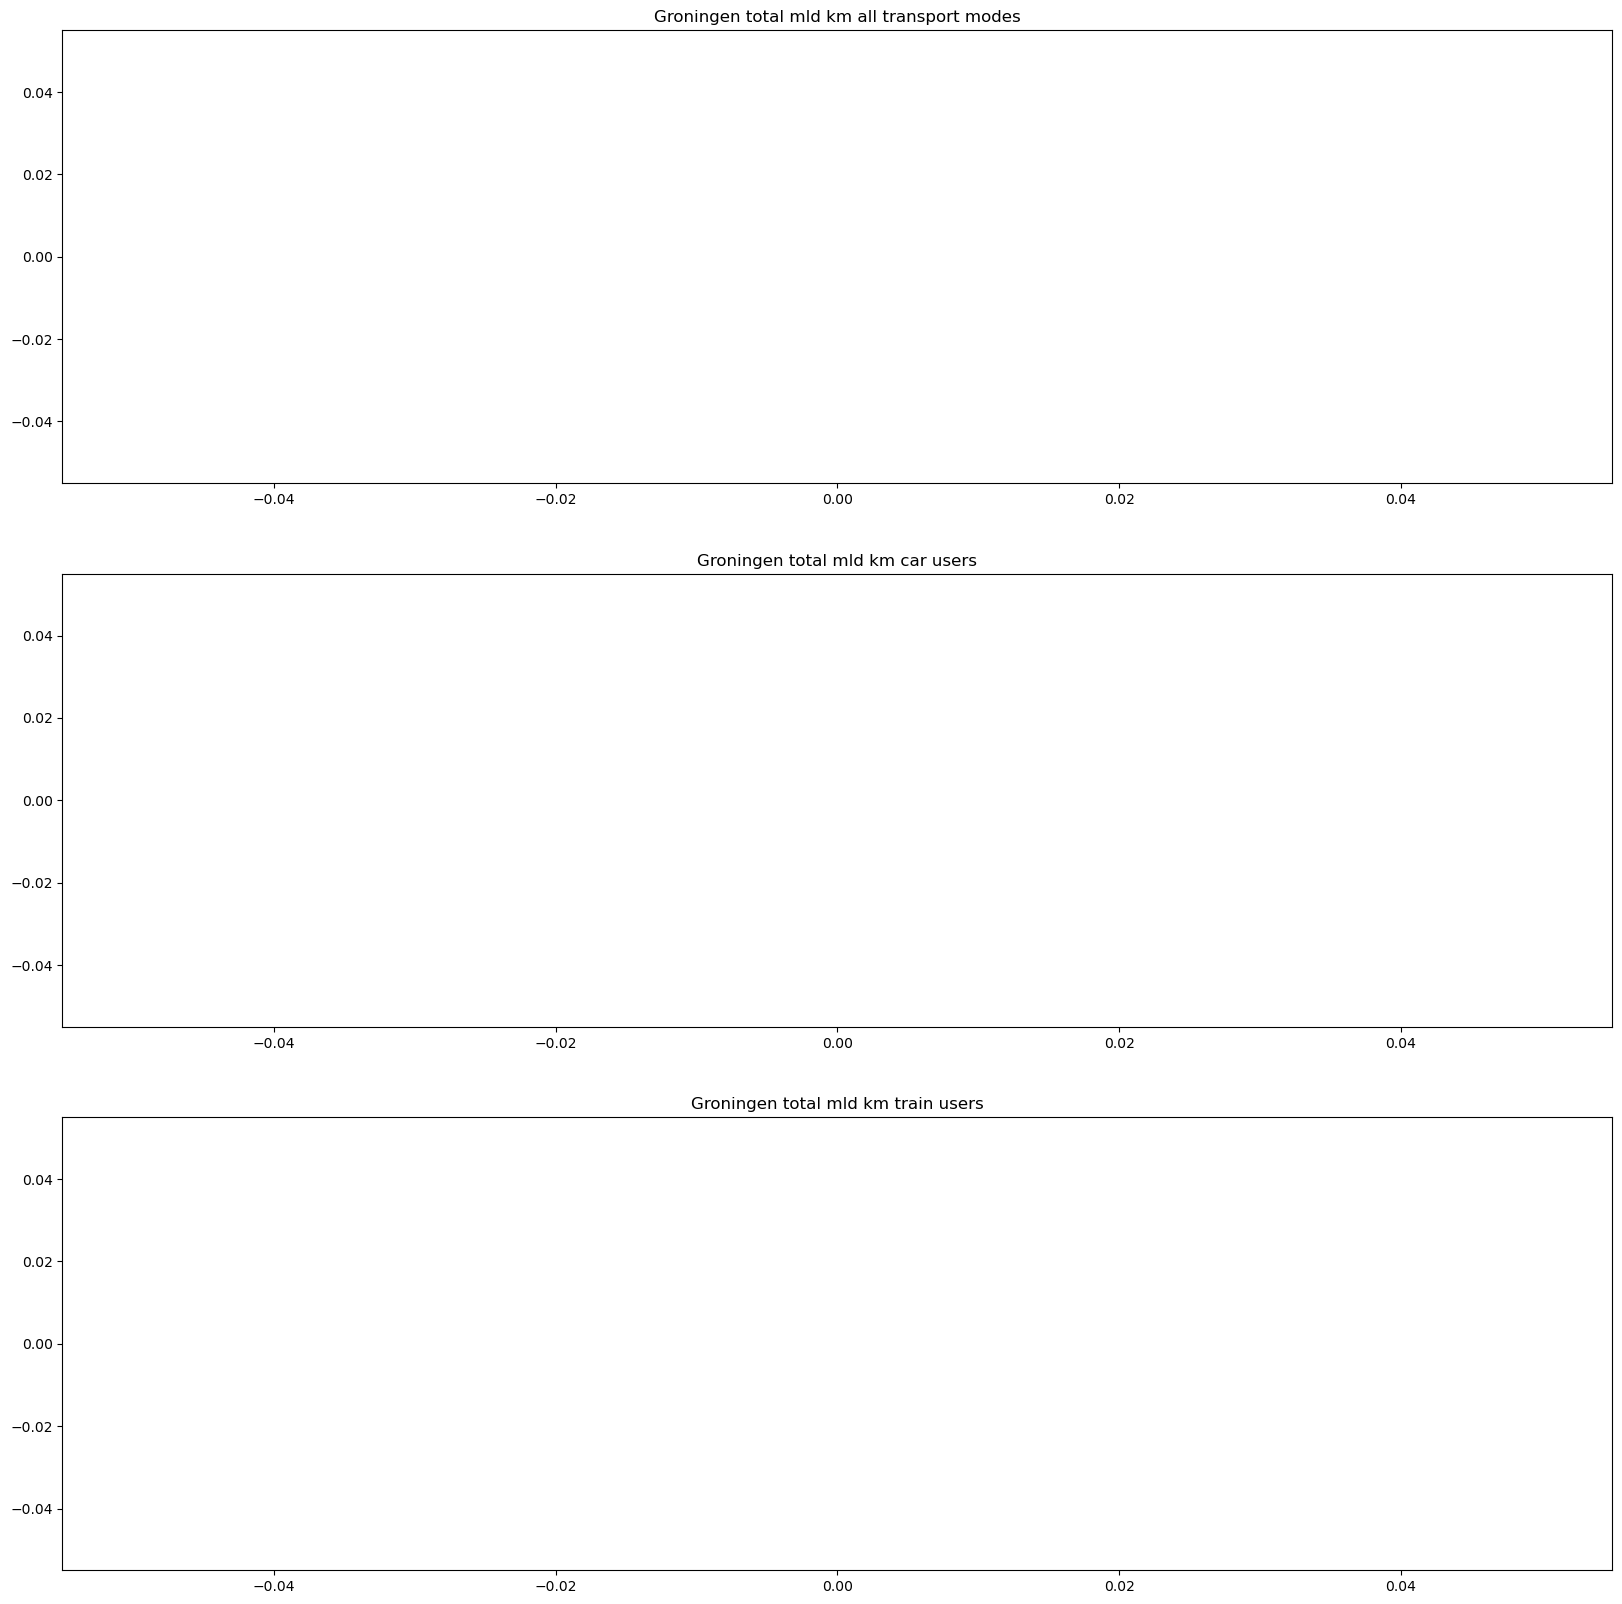

In [10]:
data = pd.read_csv("Totale_reizigerskilometers.csv", delimiter=';', decimal=',', skiprows=5)
#Data for the Netherlands:
tot = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Nederland'])].transpose() #total km's per year for all transport modes
car = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) & 
       data["Regio's"].isin(['Nederland']) ].reset_index(drop=True).transpose() + 
       data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
       data["Regio's"].isin(['Nederland']) ].reset_index(drop=True).transpose() 
      ) #total km's per year for car as driver and passenger
train = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Nederland'])].reset_index(drop=True).transpose() #total km's per year for train passengers
tot.index = [0, 0, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017] #change index names, because names are 'mld km.1' instead of the years; first two rows are a list of names which are referring to transport mode and province
car.index = train.index = tot.index 

# display(tot) #display to check table forms of new dataframes
# display(car[13]+car2[26])
# display(train[39])

plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.title('Netherlands total mld km all transport modes')
plt.plot(tot.iloc[2:,:]) #plot for total km's in Netherlands; iloc is for filtering the first two rows which are names and no values
plt.subplot(3,1,2)
plt.title('Netherlands total mld km car users')
plt.plot(car.iloc[2:,:] / tot.iloc[2:,:]) #plot for total km's for car drivers and passengers in the Netherlands devided by total km
plt.subplot(3,1,3)
# plt.title('Netherlands total mld km train users')
plt.plot(train.iloc[2:,:] / tot.iloc[2:,:]) #plot for total km's for train passengers in the Netherlands devided by total km


#Data for the province of Zuid Holland
totZH = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Zuid-Holland (PV)'])].reset_index(drop=True).transpose() #filtering the data for Zuid-Holland
carZH = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) & 
         data["Regio's"].isin(['Zuid-Holland (PV)']) ].reset_index(drop=True).transpose() + 
         data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
         data["Regio's"].isin(['Zuid-Holland (PV)']) ].reset_index(drop=True).transpose() 
        )
trainZH = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Zuid-Holland (PV)'])].reset_index(drop=True).transpose()
totZH.index = carZH.index = trainZH.index = tot.index

plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.title('Zuid Holland total mld km all transport modes')
plt.plot(totZH.iloc[2:,:]) #plot for total km's in Zuid-Holland
plt.subplot(3,1,2)
plt.title('Zuid Holland total mld km car users')
plt.plot(carZH.iloc[2:,:] / totZH.iloc[2:,:]) #plot for total km's in Zuid Holland for car drivers and passengers in Zuid-Holland devided by total km
plt.subplot(3,1,3)
plt.title('Zuid Holland total mld km train users')
plt.plot(trainZH.iloc[2:,:] / totZH.iloc[2:,:] ) #plot for total km's for train passengers in the Zuid-Holland devided by total km


#data for the province of Groningen
totGR = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Groningen (PV)'])].reset_index(drop=True).transpose() #filtering the data for Groningen
carGR = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) &
            data["Regio's"].isin(['Groningen (PV)']) ].reset_index(drop=True).transpose() + 
            data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
            data["Regio's"].isin(['Groningen (PV)']) ].reset_index(drop=True).transpose() 
        )
trainGR = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Groningen (PV)'])].reset_index(drop=True).transpose()
totGR.index = carGR.index = trainGR.index = tot.index

plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.title('Groningen total mld km all transport modes')
plt.plot(totGR.iloc[2:,:]) #plot for total km's in Groningen
plt.subplot(3,1,2)
plt.title('Groningen total mld km car users')
plt.plot(carGR.iloc[2:,:] / totGR.iloc[2:,:]) #plot for total km's in Zuid Holland for car drivers and passengers in Groningen devided by total km
plt.subplot(3,1,3)
plt.title('Groningen total mld km train users')
plt.plot(trainGR.iloc[2:,:] / totGR.iloc[2:,:]) #plot for total km's for train passengers in the Groningen devided by total km

[]

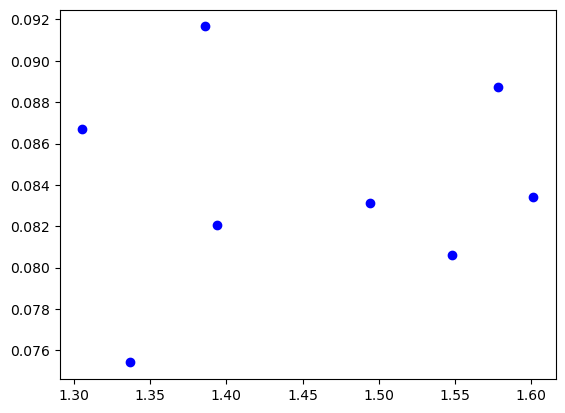

In [11]:
plt.plot(gemjaar1017.values, train.iloc[2:,:] / tot.iloc[2:,:], 'bo')
plt.plot()